TODO: 
* Quine-McCluskey Tabular Method
* add -> <=> and other  
* make |__|--|__|--| waveform 

In [13]:
class Logic:
    def __init__(self, in_count, out_count, ty='GATE'):
        self.in_count = in_count
        self.out_count = out_count
        self.type = ty
    def name(self):
        return self.__class__.__name__
    
    @staticmethod
    def block_diagram(ip, op):
        m = min(ip, op)
        diff = abs(ip - op)

        print("    +-----------+    ")
        print("    |   Block   |    ")
        print("    |  Diagram  |    ")
        for i in range(m):
            print("--->|           |--->")
        for i in range(diff):
            if ip < op:
                print("    |           |--->")
            else:
                print("--->|           |    ")
        print("    |           |    ")
        print("    |           |    ")
        print("    +-----------+    ")
    
    @staticmethod
    def binary(n, logic=2):
        val = []
        n=n
        c=0
        k=0
        for c in range(logic-1, -1, -1):
            k = n >> c
            if (k & 1):
                val.append(1)
            else:
                val.append(0)
        return val
    
    @staticmethod
    def input_gen(in_count):
        input_table = []
        for i in range(2**in_count):
            input_table.append(Logic.binary(i, logic=in_count))
        return input_table
    
    @staticmethod
    def truth_table(gate, input_table):
        output_table = []
        for i in input_table:
            if gate.in_count == 1:
                try:
                    res = gate.operator(i[0])
                except:
                    res = gate.operator(i)
            else:
                res = i[0]
                for j in i[1:]:
                    res = gate.operator(res,j)
            
            output_table.append(res)

        return output_table
    
    def output(self, ip_list):
        if self.in_count == 1:
            res = self.operator(ip_list[0])
        else:
            res = ip_list[0]
            for j in ip_list[1:]:
                res = self.operator(res,j)

        return res

class AND(Logic):
    def __init__(self, in_count):
        super().__init__(in_count, 1)

    def operator(self, a, b):
        return bool(a and b)
    
    
class OR(Logic):
    def __init__(self, in_count):
        super().__init__(in_count, 1)

    def operator(self, a, b):
        return bool(a or b)
    
    
class NOT(Logic):
    def __init__(self,):
        super().__init__(1, 1)

    def operator(self, a):
        return bool(not a)



class NAND(Logic):
    def __init__(self, in_count):
        super().__init__(in_count, 1)

    def operator(self, a, b):
        return bool(not(a and b))
    
class NOR(Logic):
    def __init__(self, in_count):
        super().__init__(in_count, 1)

    def operator(self, a, b):
        return bool(not(a or b))
    
class XOR(Logic):
    def __init__(self, in_count):
        super().__init__(in_count, 1)

    def operator(self, a, b):
        return bool(((not a) and b) or (a and (not b)))
    
class XNOR(Logic):
    def __init__(self, in_count):
        super().__init__(in_count, 1)

    def operator(self, a, b):
        return bool(not(((not a) and b) or (a and (not b))))
    
class TRUE(Logic):
    def __init__(self,):
        super().__init__(1, 1, ty='INPUT')

    def operator(self, a=1):
        return True
    
class FALSE(Logic):
    def __init__(self,):
        super().__init__(1, 1, ty='INPUT')

    def operator(self, a=0):
        return False
    
class LED(Logic):
    def __init__(self,):
        super().__init__(1, 1, ty='OUTPUT')
        
    def operator(self, a):
        return bool(a)
    
    
op1 = Logic.truth_table(NAND(3), Logic.input_gen(3))
op2 = Logic.truth_table(NOT(), Logic.truth_table(NAND(3), Logic.input_gen(3)))
print(op1)
print(op2)
Logic.truth_table(XOR(2), zip(op1, op2))

[True, False, True, False, True, False, True, True]
[False, True, False, True, False, True, False, False]


[True, True, True, True, True, True, True, True]

In [2]:
class Circuit:
    def __init__(self, label, gate):
        self.dot_code = ''
        self.label = label
        self.gate = gate
        self.logic_output = []
        self.logic_input = []
    

    def tree(self, depth=0):
        for logic_gate in self.logic_input:
            logic_gate.tree(depth=depth+1)
        
        for op in self.logic_output:
            print(self.label + '->'+op.label )
    def output(self):
#         print(self.gate.name())
        chield_op = []
        if self.gate.type == 'INPUT':
            return self.gate.operator()
        if self.logic_input ==[]:
            raise ValueError("Input missing")
        for logic_gate in self.logic_input:
            chield_op.append(logic_gate.output())
        return self.gate.output(chield_op)
    
    def inlink(self, gate, logic_input):
        self.dot_code = self.dot_code + '\n' + gate.label+'[label="'+gate.gate.name()+'('+gate.label+')", shape=box]'
        self.dot_code = self.dot_code + '\n' + logic_input.label+'[label="'+logic_input.gate.name()+'('+gate.label+')", shape=box]'
        self.dot_code = self.dot_code + '\n' + logic_input.label+'->'+gate.label
        gate.logic_input.append(logic_input)
        logic_input.logic_output.append(gate)

logic1 = Circuit('IN1', TRUE())
logic2 = Circuit('IN2', TRUE())
logic_and = Circuit('C', AND(2))
logic_xor = Circuit('D', XOR(2))
logic_xor1 = Circuit('E', XOR(2))
logic_xor2 = Circuit('F', XOR(2))
logic_xor3 = Circuit('G', XOR(2))
logic_xor4 = Circuit('H', XOR(2))
logic_led = Circuit('LED', LED())

logic_led.inlink(logic_and, logic1)
logic_led.inlink(logic_and, logic2)
logic_led.inlink(logic_xor, logic2)
logic_led.inlink(logic_xor1, logic_and)
logic_led.inlink(logic_xor3, logic_xor2)
logic_led.inlink(logic_xor3, logic_xor)
logic_led.inlink(logic_xor2, logic1)
logic_led.inlink(logic_xor1, logic2)
logic_led.inlink(logic_xor2, logic_and)
logic_led.inlink(logic_xor, logic_xor1)
logic_led.inlink(logic_led, logic_xor)
logic_led.inlink(logic_led, logic_xor3)

# logic_led.tree()

print(logic_led.output())

code = "digraph {" + logic_led.dot_code + '\n}'

f = open("tmp", 'w+')
f.write(code)
f.close()


True


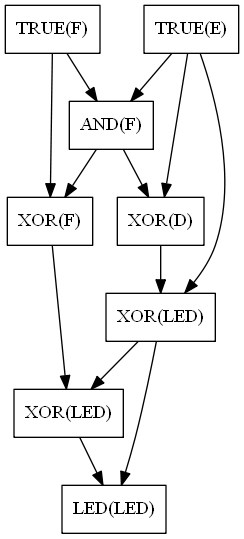

In [3]:
import os
os.system("dot -Tpng tmp > output.png")

from IPython.display import display, Image
display(Image(filename='output.png'))

In [4]:
Logic.block_diagram(5,10)

    +-----------+    
    |   Block   |    
    |  Diagram  |    
--->|           |--->
--->|           |--->
--->|           |--->
--->|           |--->
--->|           |--->
    |           |--->
    |           |--->
    |           |--->
    |           |--->
    |           |--->
    |           |    
    |           |    
    +-----------+    
